## **STORE SALES - MINERAÇÃO DE DADOS**

Universidade Federal de Ouro Preto - UFOP

**Aluna:** Ananda Mendes Souza - 19.1.4030

**Professor:** Anderson Almeida Ferreira

---



## 1. INTRODUÇÃO

O conceito de mineração de dados existe antes mesmo da criação dos computadores. É uma conceitualização antiga, mas que pode ser traçada até o Teorema de Bayes em 1763, uma fórmula matemática que determina a probabilidade condicional de um evento.

A perspectiva moderna do tema, porém, veio a partir de algumas inovações que mudaram o patamar tecnológico no último século. A produção de dados tem crescido mais e mais a cada dia. Segundo a IBM, a produção diária global de dados é de 2,5 quintilhões de bytes. Essa geração exorbitante de dados dá origem ao chamado Big Data, termo utilizado para designar a enorme quantidade de informações armazenadas por banco de dados que podem ser acessados remotamente e que estão interligados

Na medida em que processadores, bancos de dados e a tecnologia como um todo evoluíram ao longo das décadas seguintes, a mineração de dados tornou-se não apenas mais poderosa, mas também mais eficiente em todas as aplicações.

Dito isso, esse problema trata das vendas de produtos nas principais lojas do Equador. São mais de 3 milhões de dados que incluem datas, informações das lojas e dos produtos, número de vendas e etc. 

Com o objetivo de:  

*   detectar tendências;
*   prever vários resultados;
*   modelar seu público-alvo;
*   coletar informações sobre o uso do produto/serviço

Este trabalho pode ajudar tanto quem vende quanto quem compra produtos, visto que pode ajudar a maximizar o lucro das vendas, por meio de uma prévia das vendas em períodos sem deixar que faltem produtos essenciais para os clientes, além de evitar possíveis desperdícios com produtos encalhados no estoque. Ou seja, analisando as vendas dos últimos dias é possível analisar quais são os produtos mais vendidos e prever a melhor reposição de estoque.

## 2. FUNDAMENTAÇÃO TEÓRICA

Nesta seção, apresenta-se os conceitos e artigos utilizados como fundamentação teórica para o entendimento do trabalho. Destaca-se que a pretensão desta seção não é esgotar os assuntos, mas, sim, fornecer uma base sólida que permita um entendimento mínimo dos temas de Mineração de Dados e de Textos de modo que seja possível compreender o trabalho.

### 2.1 Conceitos

Um banco de dados é uma coleção formada por dados, que podem ser definidos como fatos conhecidos que podem ser registrados e possuem significado implícito. Representam algum aspecto do mundo real, é logicamente coerente e possui algum significado inerente. (Elmasri e Navathe, 2011). 

A Mineração de Dados ou Data Mining são procedimentos utilizados na exploração e
análise de amplos volumes de dados, a partir de técnicas e algoritmos específicos, com o
objetivo de buscar padrões, previsões, associações, erros, entre outros e, a partir do conhecimento adquirido, realizar novas estratégias para o negócio, entender a necessidade e comportamento dos consumidores, prever o desempenho financeiro da organização, mitigação de riscos futuros entre outros, muitas destas questões difíceis de serem identificadas analisando os dados a olho “nu”. 

As funcionalidades da mineração de dados são usadas para especificar os tipos de informações a serem obtidas nas tarefas de mineração (Castro e Ferrari, 2016), podendo
ser caracterizadas como: **Preditivas**, que utilizam inferência a partir dos dados para
fazer predições de valores futuros ou desconhecidos de outras variáveis de interesse; ou **Descritivas**, que caracterizam as propriedades gerais dos dados, buscando padrões que descrevam os dados ou descobrir um modelo a partir dos dados selecionados (Garcia,2008). 

Conhecer e preparar os dados de forma adequada é a etapa chamada de pré-processamento de dados e tem por motivação tornar o processo de mineração muito mais eficaz e eficiente (Castro e Ferrari, 2016).

Depois de pré-processar um agrupamento é um conjunto de registros semelhantes entre si, mas diferentes dos outros registros nos demais agrupamentos (Juste, 2013). A classificação consiste em construir um modelo para avaliar a classe de um objeto não rotulado, examinando suas características e atribuir a ele uma classe pré-definida (Harrison, 1998).

### 2.2 Método 

Para modelagem o método utilizado foi o Prophet. O Prophet é um pacote para R e Python usado em produção no Facebook. Ele implementa o algoritmo de previsão de séries temporais, programado para detectar automaticamente os padrões sazonais de uma série de input. Sendo possível customizar alguns inputs de parâmetros manualmente, como indicar a presença de períodos sazonais (semanal ou anual), feriados e changepoints.

O Prophet foi escolhido pois seria uma maneira fácil e eficaz para cumprir com o objetivo deste trabalho que é prever as vendas por períodos (podem ser semanais, quinzenais, mensais, etc).

A entrada para o Prophet é sempre um dataframe com duas colunas:

datas (ds) – em um formato esperado pelos Pandas, idealmente AAAA-MM-DD para uma data ou AAAA-MM-DD HH: MM: SS para um registro de data e hora;

dados (y) – numérica e representando a medida que deve ser prevista.

**Obs:** Como o dataset é muito grande nesse primeiro momento será analisado só as vendas da família de automotivos.

### 2.3 Resultados

A função “performance_metrics” foi usada para calcular algumas estatísticas úteis do desempenho de previsão: erro quadrático médio (MSE), erro quadrático médio (RMSE), erro absoluto médio (MAE), erro percentual absoluto médio (MAPE) e cobertura das estimativas “yhat_lower” e “yhat_upper”. Eles são calculados em uma janela contínua das previsões em cv após classificação por horizonte (ds menos corte). Por padrão, 10% das previsões serão incluídas em cada janela.




## DESENVOLVIMENTO

### Pré-processamento e transformação

#### Importação das bibliotecas necessárias

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import math

import sklearn
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale

#### Importação dos dados

In [48]:
df = pd.read_csv('./datasets/train.csv')
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


#### Tipos de atributos

In [49]:
df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

Através do código acima, separa-se todos os atributos (colunas) que compõem o dataset "Store Sales". Observa-se que, em relação aos tipos de atributos, tem-se:

* Atributos categóricos nominais: 'family', 'store_nbr' 
* Atributos categóricos ordinais: 'date', 'id'
* Atributos binários simétricos: -
* Atributos binários assimétricos: -
* Atributos contínuos: 'sales'
* Atributos discretos: 'date','id'



#### Atributos de texto

Os atributos textuais são: 'family'

**family**: identifica o tipo de produto vendido.


#### Atributos numéricos

Os atributos numéricos são: 'id', 'store_nbr', 'sales' e 'onpromotion'

**id** : identificador das vendas em um determinado período.

**store_nbr**: identifica a loja na qual os produtos são vendidos.

**sales**: fornece o total de vendas de uma família de produtos em uma determinada loja em uma determinada data.

**onpromotion**: fornece o número total de itens em uma família de produtos que estavam na promoção em uma loja em uma determinada data.

### Transformação, remoção de dados e inconsistências

Observa-se que os atributos referentes a 'id' nesse momento são desnecessários, e podem ser retirados do dataset.

Além disso, para facilitar a manipulação dos dados mudei o atributo 'date' de object para datetime.

Por fim, para remover as inconsistências as restrições usadas foram que 'sales' e 'store_nbr' não podem ser negativo. Caso sejam, a linha é removida.


In [50]:
# Fazendo uma cópia para não alterar os valores originais
dfCopia = df.copy()

# Removendo o atributo id
dfCopia = dfCopia.drop(['id'], axis=1)

# Mudando o tipo do atributo date
dfCopia['date'] = pd.to_datetime(dfCopia['date'])

# Remove dados duplicados (somente se todos os valores forem iguais)
dfCopia = dfCopia.drop_duplicates()

# pegando os indices problemáticos
indexesProblematicosSales = dfCopia[dfCopia.sales < 0].index
indexesProblematicosStore = dfCopia[dfCopia.store_nbr < 0].index

# Removendo os índices:
dfCopia.drop(indexesProblematicosSales, inplace=True)
dfCopia.drop(indexesProblematicosStore, inplace=True)

dfCopia

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


#### Análise dos atributos numéricos

Com os atributos numéricos restantes são mostrados o: valor médio, máximo e mínimo, intervalo de valores, desvio-padrão e valores aberrantes.

Valor médio:

In [51]:
names = ["store_nbr", "sales", "onpromotion"]
dfCopia[names].mean().round(2) 

store_nbr       27.50
sales          357.78
onpromotion      2.60
dtype: float64

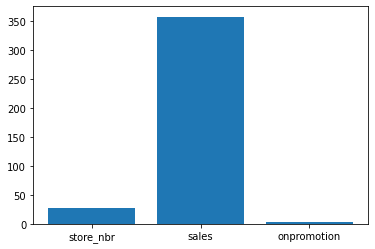

In [52]:
values = dfCopia[names].mean() 
plt.bar(names, values)
plt.show()

Valor máximo:

In [53]:
dfCopia[names].max()

store_nbr          54.0
sales          124717.0
onpromotion       741.0
dtype: float64

Valor mínimo:

In [54]:
print(dfCopia[names].min())

store_nbr      1.0
sales          0.0
onpromotion    0.0
dtype: float64


Intervalo de valores:

In [55]:
print("store_nbr:", dfCopia["store_nbr"].min(), "-", dfCopia["store_nbr"].max())
print("sales:", dfCopia["sales"].min(), "-", dfCopia["sales"].max())
print("onpromotion:", dfCopia["sales"].min(), "-", dfCopia["onpromotion"].max())

store_nbr: 1 - 54
sales: 0.0 - 124717.0
onpromotion: 0.0 - 741


Desvio-padrão:

In [56]:
dfCopia[names].std().round(2)

store_nbr        15.59
sales          1102.00
onpromotion      12.22
dtype: float64

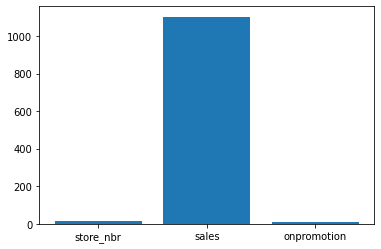

In [57]:
values = dfCopia[names].std()
plt.bar(names, values)
plt.show()

Valores aberrantes (outliers): 

In [58]:
ausentes = dfCopia[names].loc[dfCopia[names].isnull().any(axis=1)]
ausentes

,store_nbr,sales,onpromotion


Valores Nulos:


In [59]:
dfCopia.isnull().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

**Vendas por data:** 

Como o dataset retrata 3 meses do ano de 2013, a análise é feita por meses.

In [60]:
vendas_por_data = dfCopia.groupby(dfCopia['date'].dt.month)['sales'].sum().round(2)
vendas_por_data

date
1     9.444215e+07
2     8.063723e+07
3     9.722849e+07
4     9.066812e+07
5     9.439914e+07
6     9.451670e+07
7     1.033631e+08
8     8.347238e+07
9     7.747368e+07
10    8.008038e+07
11    8.033579e+07
12    9.702784e+07
Name: sales, dtype: float64

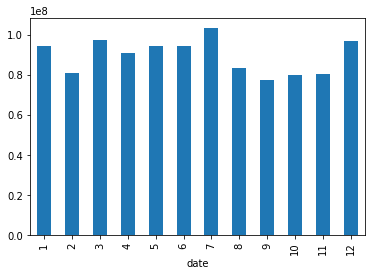

In [61]:
dfCopia.groupby(dfCopia['date'].dt.month)['sales'].sum().plot.bar()

**Vendas por tipo de produto**

Faz a soma das vendas ('sales') por tipo de produto ('family').

In [62]:
salesproduct = dfCopia.groupby(['family'])['sales'].sum().reset_index()

salesproduct

,family,sales
0,AUTOMOTIVE,5.548220e+05
1,BABY CARE,1.005100e+04
2,BEAUTY,3.378930e+05
3,BEVERAGES,2.169545e+08
4,BOOKS,6.438000e+03
5,BREAD/BAKERY,4.213395e+07
6,CELEBRATION,7.611770e+05
7,CLEANING,9.752129e+07
8,DAIRY,6.448771e+07
9,DELI,2.411032e+07


Text(0.5, 1.0, 'All Product Sales')

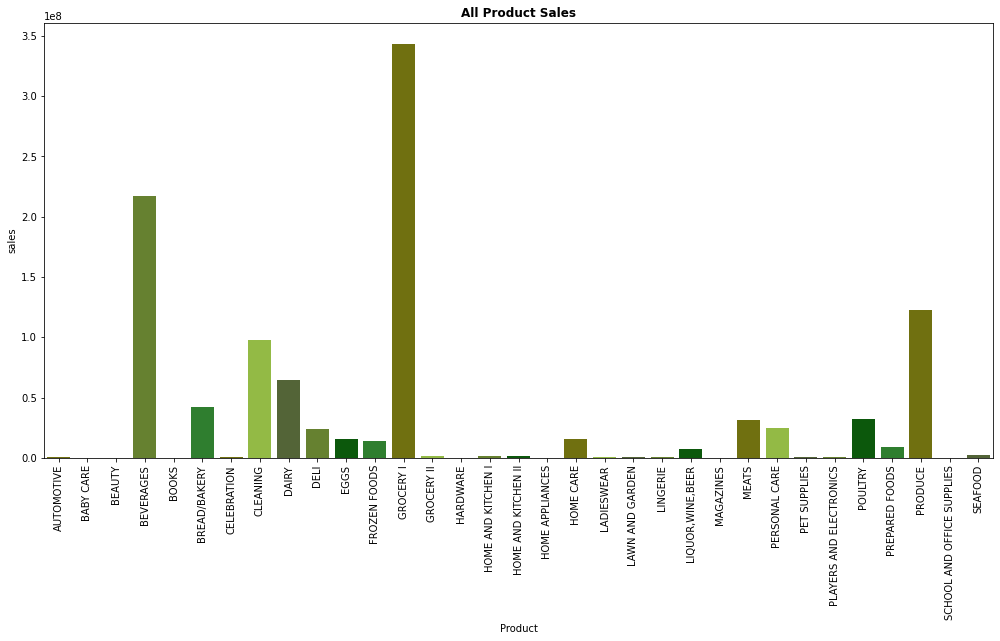

In [63]:
fig = plt.figure(figsize=(17,8))
color = ['#808000','#9ACD32','#556B2F','#6B8E23','#006400','#228B22']
sns.barplot(x=salesproduct['family'],y=salesproduct['sales'], palette = color)
plt.tick_params(axis = 'x',rotation = 90)
plt.xlabel('Product',)
plt.title('All Product Sales',fontweight='bold')

#### Suavização de ruídos

A fim de reduzir a influência de ruídos nos atributos do conjunto de dados estudado, dividi os valores de cada atributo em faixas, de modo que cada faixa contenha aproximadamente a mesma quantidade de valores. Em seguida, os valores contidos em cada faixa são substituídos pela média das vendas.

Text(0, 0.5, 'Valor')

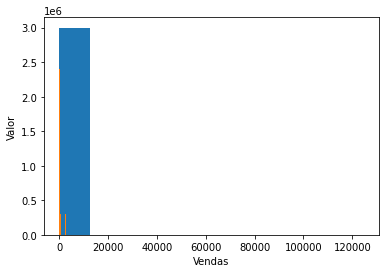

In [64]:
#gráfico em azul
plt.hist(dfCopia['sales'], bins = 10)
plt.xlabel('Vendas')
plt.ylabel('Valor')

# dividindo o atributo 'sales' em 10 faixas removendo as duplicidades
bins = pd.qcut(dfCopia['sales'], 10, duplicates= 'drop')

# quantidade de valores aproximadamente igual em cada faixa 
bins.value_counts()

# Neste exemplo, a coluna 'Age' sera agrupada
# pelas faixas definidas pelo metodo qcut.
grupos = dfCopia['sales'].groupby(bins)

# obtendo a media de cada faixa
medias = grupos.mean()

# Obtendo a nova coluna.
# Neste caso, cada elemento de bins consiste 
# no intervalo que o respectivo valor de 'sales'
# pertence e, assim, a funcao informada em apply
# retornara a respectiva media de cada intervalo.
novo_sales = bins.apply(lambda x : medias[x])

# a coluna 'Age' do DataFrame original é atualizada
dfCopia['sales'] = novo_sales

#gráfico em laranja
plt.hist(dfCopia['sales'], bins = 10)
plt.xlabel('Vendas')
plt.ylabel('Valor')

#### Transformação de atributos categóricos nominais em vetor numérico

Sabendo que os atributos categóricos nominais são 'family', utiliza-se o conceito de Ordinal Enconding para transformá-los em vetor númerico: cada valor único passa a ter um valor numérico diferente.

In [65]:

# Conferindo os atributos categóricos
s = (dfCopia.dtypes == 'object')
categoricos = list(s[s].index)

print("Atributos categóricos:", categoricos)

oe = LabelEncoder()

# Aplicando o 'Label encoder' em cada coluna com atributos categóricos
for obj in categoricos:
  dfCopia[obj] = oe.fit_transform(dfCopia[obj].astype(object))

dfCopia

Atributos categóricos: ['family']


,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,0,0.408445,0
1,2013-01-01,1,1,0.408445,0
2,2013-01-01,1,2,0.408445,0
3,2013-01-01,1,3,0.408445,0
4,2013-01-01,1,4,0.408445,0
...,...,...,...,...,...
3000883,2017-08-15,9,28,515.641921,0
3000884,2017-08-15,9,29,201.073021,1
3000885,2017-08-15,9,30,2758.646999,148
3000886,2017-08-15,9,31,75.930102,8


#### Transformação de atributos categóricos ordinais em atributos numéricos

Já os atributos categóricos ordinais apenas o  **'date'**. De forma que não é uma boa ideia mudá-lo para numérico.


#### Normalização dos valores de atributos numéricos

Na normalização por padronização, os diferentes atributos contínuos poderão abranger diferentes intervalos, mas deverão possuir os mesmos valores para alguma medida de
posição e de espalhamento/variação [Faceli et al. 2011]. Tipicamente, tais medidas irão
consistir na média e no desvio-padrão. Neste caso, o valor normalizado de um atributo j
em um objeto i é dado por:

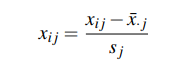

onde image.png representam a média do atributo j e o seu desvio-padrão, respectivamente.
Desse modo, cada atributo j terá média zero e desvio-padrão unitário.

In [66]:
# Obtendo os nomes das colunas do DataFrame como uma lista.
cols = list(dfCopia.columns)

#removendo as colunas que não precisam ser normalizadas  
cols.remove('date')

# Copiando os dados e aplicando a normalizacao
# por padronização a todas as colunas do DataFrame.
# Por padrao, o metodo scale subtrai a media e divide pelo desvio-padrao.
dados_dist = dfCopia.copy()
dados_dist[cols] = dfCopia[cols].apply(scale)

dados_dist.round(2)

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,-1.70,-1.68,-0.44,-0.21
1,2013-01-01,-1.70,-1.58,-0.44,-0.21
2,2013-01-01,-1.70,-1.47,-0.44,-0.21
3,2013-01-01,-1.70,-1.37,-0.44,-0.21
4,2013-01-01,-1.70,-1.26,-0.44,-0.21
...,...,...,...,...,...
3000883,2017-08-15,-1.19,1.26,0.19,-0.21
3000884,2017-08-15,-1.19,1.37,-0.19,-0.13
3000885,2017-08-15,-1.19,1.47,2.95,11.90
3000886,2017-08-15,-1.19,1.58,-0.35,0.44


### Mineração dos dados com avaliação e análise de resultados

#### Método



In [67]:
sales = df[df['family']=='AUTOMOTIVE']

data = sales[['date', 'sales']]
data.columns = ['ds', 'y']
data


,ds,y
0,2013-01-01,0.0
33,2013-01-01,0.0
66,2013-01-01,0.0
99,2013-01-01,0.0
132,2013-01-01,0.0
...,...,...
3000723,2017-08-15,8.0
3000756,2017-08-15,7.0
3000789,2017-08-15,5.0
3000822,2017-08-15,4.0


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


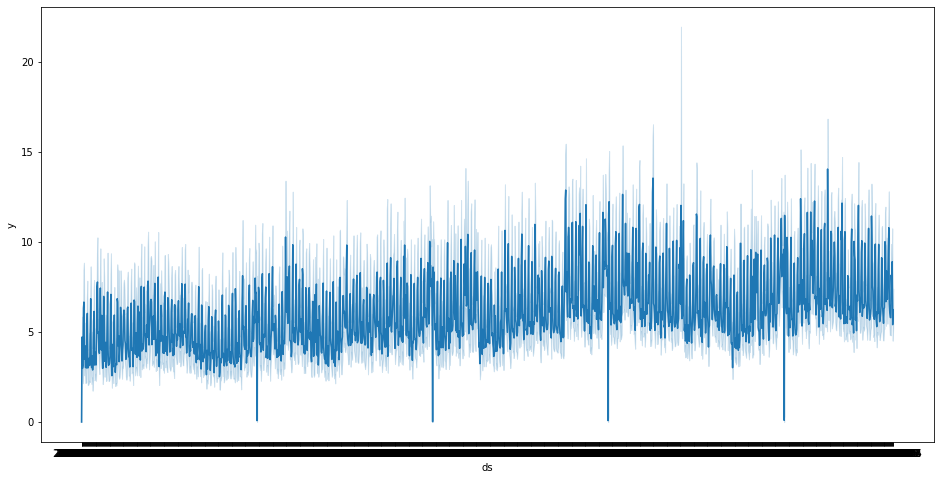

In [68]:
fig = plt.figure(figsize=(16,8))
sns.lineplot(x=data['ds'],y=data['y'])


As previsões são então feitas em um dataframe com uma coluna contendo as datas para as quais uma predição deve ser feita. Para obter um dataframe que estendesse para o futuro um número específico de dias usando o método auxiliar “Prophet.make_future_dataframe” (a priori utilizei 365 dias). Por padrão, ele também incluirá as datas do histórico, o que é útil para observar também o ajuste do modelo.

In [69]:
from fbprophet import Prophet

model = Prophet()
model.fit(data)

# Modelo de Previsão
future = model.make_future_dataframe(periods = 365)
future.tail()


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
2044,2018-08-11
2045,2018-08-12
2046,2018-08-13
2047,2018-08-14
2048,2018-08-15


In [70]:
data.tail()

,ds,y
3000723,2017-08-15,8.0
3000756,2017-08-15,7.0
3000789,2017-08-15,5.0
3000822,2017-08-15,4.0
3000855,2017-08-15,15.0


A saída da previsão será uma dataframe contendo as seguintes colunas, cada uma com seus respectivos limites inferior e superior:



*   ds – data com o modelo calculado (pode ser observado ou previsto)
*   trend – tendência
*   additive_terms – termos aditivos
* weekly – sazonalidade semanal
*   yearly – sazonalidade anual
*   multiplicative_terms – termos multiplicativos
*   yhat – valor calculado

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,3.768394,-3.853936,11.344224,3.768394,3.768394,-0.124823,-0.124823,-0.124823,-0.860475,-0.860475,-0.860475,0.735651,0.735651,0.735651,0.0,0.0,0.0,3.643571
1,2013-01-02,3.771236,-4.064098,10.629503,3.771236,3.771236,-0.229499,-0.229499,-0.229499,-0.880662,-0.880662,-0.880662,0.651163,0.651163,0.651163,0.0,0.0,0.0,3.541736
2,2013-01-03,3.774077,-4.721411,10.310550,3.774077,3.774077,-0.557156,-0.557156,-0.557156,-1.119462,-1.119462,-1.119462,0.562306,0.562306,0.562306,0.0,0.0,0.0,3.216921
3,2013-01-04,3.776919,-4.120779,10.729765,3.776919,3.776919,-0.302259,-0.302259,-0.302259,-0.773145,-0.773145,-0.773145,0.470886,0.470886,0.470886,0.0,0.0,0.0,3.474660
4,2013-01-05,3.779760,-0.961192,13.676796,3.779760,3.779760,2.300878,2.300878,2.300878,1.922136,1.922136,1.922136,0.378742,0.378742,0.378742,0.0,0.0,0.0,6.080638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,2018-08-11,8.567710,1.546612,19.024167,4.228186,12.980878,1.655391,1.655391,1.655391,1.922136,1.922136,1.922136,-0.266746,-0.266746,-0.266746,0.0,0.0,0.0,10.223101
2045,2018-08-12,8.570413,1.744761,19.274150,4.221513,12.998317,2.044759,2.044759,2.044759,2.332769,2.332769,2.332769,-0.288010,-0.288010,-0.288010,0.0,0.0,0.0,10.615173
2046,2018-08-13,8.573117,-1.532698,16.131325,4.201084,13.015720,-0.930434,-0.930434,-0.930434,-0.621161,-0.621161,-0.621161,-0.309272,-0.309272,-0.309272,0.0,0.0,0.0,7.642683
2047,2018-08-14,8.575820,-1.003359,16.411076,4.186884,13.033123,-1.190748,-1.190748,-1.190748,-0.860475,-0.860475,-0.860475,-0.330274,-0.330274,-0.330274,0.0,0.0,0.0,7.385072


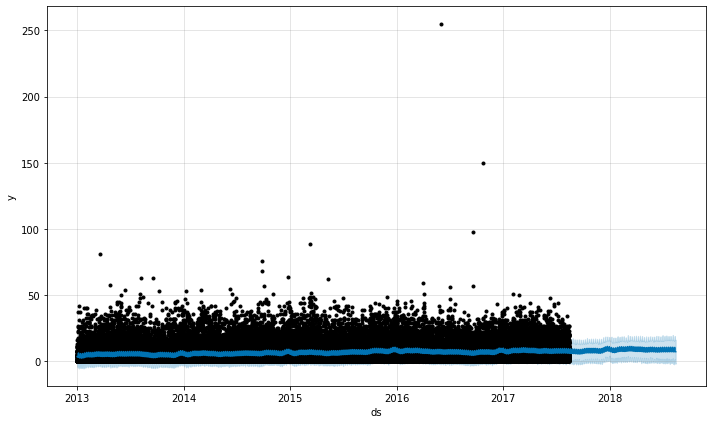

In [71]:
# Previsão 
py = model.predict(future) 

# Valores
model.plot(py)

py

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


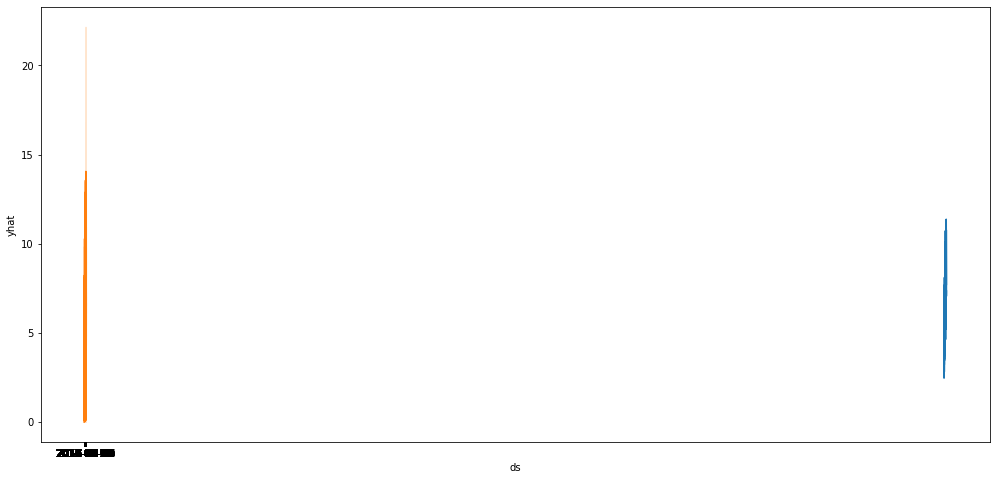

In [72]:
prediction = py[['ds', 'yhat']]

fig = plt.figure(figsize=(17,8))
sns.lineplot(x=prediction['ds'],y=prediction['yhat'])
sns.lineplot(x=data['ds'],y=data['y'])

O Prophet inclui a funcionalidade de validação cruzada (“cross validation”) de séries temporais para medir o erro de previsão usando dados históricos. Isso é feito selecionando pontos de corte no histórico e, para cada um deles, ajustando o modelo usando dados apenas até esse ponto de corte. Assim, comparam-se os valores previstos com os valores reais.

A função “cross_validation” faz a análise automaticamente através de uma série de cortes. Para isso, especifica-se o horizonte de previsão (“horizon”) e depois, opcionalmente, o tamanho do período de treinamento inicial (“initial”) e o espaçamento entre as datas de corte (“period”). 

A saída é um dataframe com os valores reais y e os valores previstos fora da amostra, em cada data de previsão simulada e para cada data de corte. Uma previsão é feita para cada ponto observado entre corte e corte+horizonte. Este dataframe pode então ser usado para calcular as medidas de erro entre yhat e y.

Para testes de avaliação do desempenho da previsão, coloquei os seguintes valores: horizonte de 365 dias (1 ano), começando com 730 dias (2 anos) de dados de treinamento no primeiro ponto de corte e, depois, fazendo previsões a cada 180 dias (1/2 ano). Em uma série temporal diária de 6 anos e meio, isso corresponde a 6 previsões totais.

In [82]:
# Verificação do modelo de validação cruzada MAE e MSE
from fbprophet.diagnostics import cross_validation

cv= cross_validation(model,initial = '730 days',period = '180 days',horizon = '365 days')

cv.head()

INFO:fbprophet:Making 4 forecasts with cutoffs between 2015-02-22 00:00:00 and 2016-08-15 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-02-23,5.38482,-2.380722,13.129999,0.0,2015-02-22
1,2015-02-23,5.38482,-2.375213,12.838120,11.0,2015-02-22
2,2015-02-23,5.38482,-2.348604,13.300041,10.0,2015-02-22
3,2015-02-23,5.38482,-2.254250,13.372202,0.0,2015-02-22
4,2015-02-23,5.38482,-2.251247,12.666013,4.0,2015-02-22


In [81]:
# Testando com cortes a cada 90 dias
cv1 = cross_validation(model,initial = '730 days',period = '90 days',horizon = '365 days')

cv1.head()

INFO:fbprophet:Making 7 forecasts with cutoffs between 2015-02-22 00:00:00 and 2016-08-15 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-02-23,5.38482,-2.668294,13.182983,0.0,2015-02-22
1,2015-02-23,5.38482,-2.375580,12.870307,11.0,2015-02-22
2,2015-02-23,5.38482,-2.486672,12.943877,10.0,2015-02-22
3,2015-02-23,5.38482,-1.692862,13.519866,0.0,2015-02-22
4,2015-02-23,5.38482,-1.981515,13.081840,4.0,2015-02-22


In [77]:
#Testando a cada 60 dias 
cv2 = cross_validation(model,initial = '730 days',period = '60 days',horizon = '365 days')

cv2.head()

INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-02-22 00:00:00 and 2016-08-15 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-02-23,5.38482,-1.797585,13.079191,0.0,2015-02-22
1,2015-02-23,5.38482,-2.272756,13.116597,11.0,2015-02-22
2,2015-02-23,5.38482,-1.928428,13.150865,10.0,2015-02-22
3,2015-02-23,5.38482,-2.157751,13.224231,0.0,2015-02-22
4,2015-02-23,5.38482,-2.548441,13.799474,4.0,2015-02-22


In [78]:
# Testando a cada 30 dias 
cv3 = cross_validation(model,initial = '730 days',period = '30 days',horizon = '365 days')

cv3.head()

INFO:fbprophet:Making 20 forecasts with cutoffs between 2015-01-23 00:00:00 and 2016-08-15 00:00:00


  0%|          | 0/20 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-24,7.45378,-0.310103,15.281211,4.0,2015-01-23
1,2015-01-24,7.45378,-0.099016,15.539391,26.0,2015-01-23
2,2015-01-24,7.45378,-0.084528,14.881247,6.0,2015-01-23
3,2015-01-24,7.45378,0.165781,15.078744,0.0,2015-01-23
4,2015-01-24,7.45378,0.404926,14.778689,12.0,2015-01-23


In [79]:
# Testando a cada 15 dias
cv4 = cross_validation(model,initial = '730 days',period = '15 days',horizon = '365 days')

cv4.head()

INFO:fbprophet:Making 40 forecasts with cutoffs between 2015-01-08 00:00:00 and 2016-08-15 00:00:00


  0%|          | 0/40 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-09,5.799359,-2.021358,13.114408,9.0,2015-01-08
1,2015-01-09,5.799359,-1.784112,13.128915,14.0,2015-01-08
2,2015-01-09,5.799359,-1.545780,13.336591,1.0,2015-01-08
3,2015-01-09,5.799359,-1.410148,13.410096,0.0,2015-01-08
4,2015-01-09,5.799359,-1.983370,12.701834,3.0,2015-01-08


## RESULTADOS



In [84]:
from fbprophet.diagnostics import performance_metrics

m = performance_metrics(cv)
m1 = performance_metrics(cv1)
m2 = performance_metrics(cv2)
m3 = performance_metrics(cv3)
m4 = performance_metrics(cv4)


m.head()

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,37 days,37.489338,6.122854,4.299452,0.562176,0.877441
1,38 days,37.713560,6.141137,4.304551,0.563279,0.877746
2,39 days,37.850824,6.152302,4.310954,0.567238,0.877569
3,40 days,37.850266,6.152257,4.312395,0.568169,0.878434
4,41 days,38.060534,6.169322,4.328905,0.569460,0.877390


In [85]:
m1.head()

,horizon,mse,rmse,mae,mdape,coverage
0,37 days,40.098452,6.332334,4.283290,0.550937,0.880882
1,38 days,40.315217,6.349427,4.290569,0.552255,0.880425
2,39 days,40.600387,6.371843,4.303890,0.553442,0.879528
3,40 days,40.924693,6.397241,4.316712,0.554718,0.879229
4,41 days,41.046302,6.406739,4.327458,0.556649,0.878196


In [86]:
m2.head()

,horizon,mse,rmse,mae,mdape,coverage
0,37 days,35.265273,5.938457,4.266498,0.556685,0.882784
1,38 days,35.576834,5.964632,4.275877,0.556667,0.882606
2,39 days,35.422029,5.951641,4.267327,0.556246,0.883394
3,40 days,35.750641,5.979184,4.279126,0.555886,0.883064
4,41 days,35.840855,5.986723,4.289983,0.557347,0.882530


In [87]:
m3.head()

,horizon,mse,rmse,mae,mdape,coverage
0,37 days,36.426334,6.035423,4.283512,0.551953,0.881143
1,38 days,36.612621,6.050836,4.290092,0.551997,0.880876
2,39 days,36.591763,6.049113,4.288811,0.551674,0.880927
3,40 days,36.856389,6.070946,4.299236,0.551126,0.880266
4,41 days,36.902105,6.074710,4.306229,0.551674,0.879757


In [88]:
m4.head()

,horizon,mse,rmse,mae,mdape,coverage
0,37 days,36.923266,6.076452,4.324002,0.553657,0.878919
1,38 days,36.807089,6.066885,4.321884,0.554387,0.878819
2,39 days,36.731260,6.060632,4.318528,0.553858,0.878915
3,40 days,36.784977,6.065062,4.321092,0.553657,0.878638
4,41 days,36.756249,6.062693,4.321456,0.555020,0.878695


Os pontos mostram o erro percentual absoluto para cada previsão, com uma linha azul mostrando a média da métrica, tomada em uma janela rolante dos pontos.

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


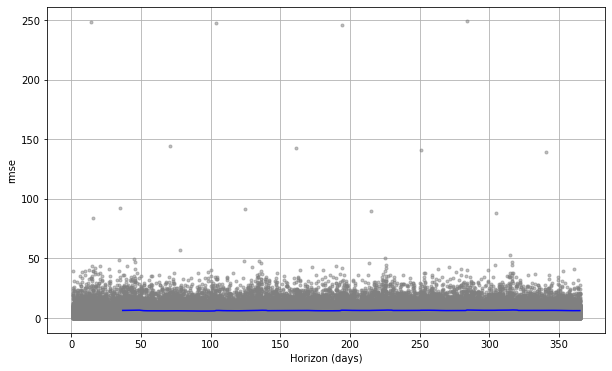

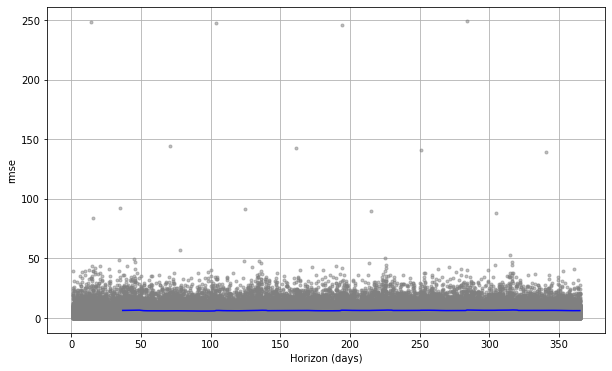

In [76]:
from fbprophet.plot import plot_cross_validation_metric

plot_cross_validation_metric(cv,metric = 'rmse')

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


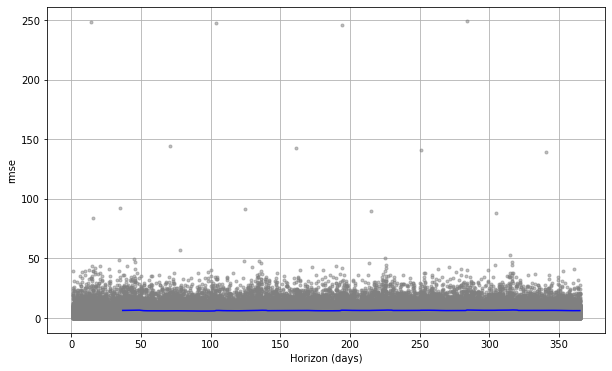

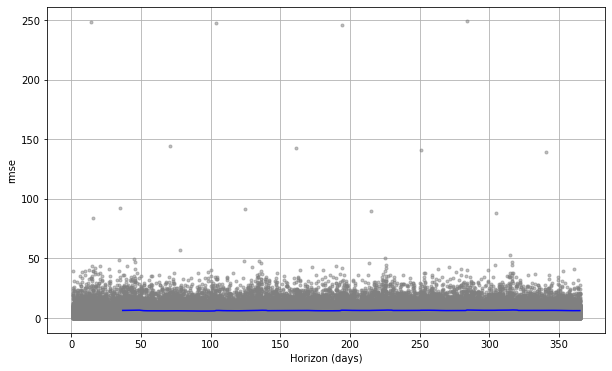

In [90]:
plot_cross_validation_metric(cv1,metric = 'rmse')

## CONCLUSÃO

Através da elaboração deste trabalho, foi possível observar que fazer a previsão em períodos de 90 dias tem uma acurácia melhor (cerca de 40%) e, consequentemente, melhores resultados para as lojas. Para saber a acurácia usando o performance_metrics, analisa-se o erro quadrático médio (MSE), visto que dá um maior peso aos maiores erros, já que, ao ser calculado, cada erro é elevado ao quadrado individualmente e, após isso, a média desses erros quadráticos é calculada.

Ademais, os proximos passos referente a essa pesquisa é testar com outros modelos e comparar a acurácia com o Prophet, além de modelar com outras famílias de produtos que não seja só a automativa.

## REFERÊNCIAS



*   CASTRO, Leandro N. de, FERRARI, Daniel G. Introdução à Mineração de Dados: conceitos básicos, algoritmos e aplicações. 1ª edição. São Paulo: Saraiva, 2016.

*   ELMASRI, Ramez; NAVATHE, Shamkant B. Sistemas de Bancos de Dados. 6ª
edição. São Paulo: Pearson Addison Wesley, 2011.

*   GARCIA, Edi W. Pesquisar e Avaliar Técnicas de Mineração de Dados com o uso
da Ferramenta Oracle Data Mining. 2008. 66 fls. Trabalho de Conclusão de Curso.
Fundação Educacional do Município de Assis – FEMA. Assis, 2008.


*   HARRISON, Thomas H. Intranet Data Warehouse. São Paulo, Berkeley Brasil, 1998.
*   JUSTE, Gleice E. Uma Proposta de Mineração de Dados na Base de Dados do
Rodeca utilizando a ferramenta Weka. 2013. 63 fls. Trabalho de Conclusão de Curso. Fundação Educacional do Município de Assis – FEMA. Assis, 2013.







